In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
pd.options.display.max_rows = 10
# semilla aleatoria para rerpoducibilidad
numpy.random.seed(7)

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 1. Datos de carga de la Red Neuronal
Siempre que trabajemos con algoritmos de machine learning que utilicen un proceso estocástico(por ejemplo, números aleatorios), es una buena idea establecer la semilla del número aleatorio.
Esto es para que pueda ejecutar el mismo código una y otra vez y obtener el mismo resultado. Esto es útil si necesita demostrar un resultado, comparar algoritmos usando la misma fuente de aleatoriedad o depurar una parte de su código.

In [2]:
# cargamos el conjunto de datos
dataset = pd.read_csv('international-airline-passengers.csv',
                        usecols=[1], engine='python', skipfooter=3)

El siguiente código calcula el **índice del punto de división** y separa los datos en los conjuntos de datos de formación con el 67% de las observaciones que podemos utilizar para entrenar a nuestro modelo, dejando el 33% restante para probar el modelo.

96 48


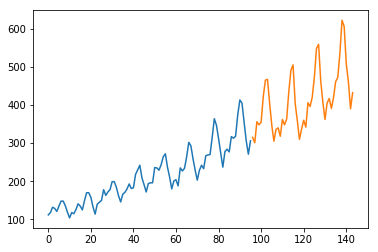

In [3]:
#dividimos datos en entreno y&amp;nbsp; datos para el test
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size::,:]
print(len(train), len(test))
plt.plot(train)
plt.plot(test)
plt.show()

In [4]:
# convertir un array de valores en una matriz de conjuntos de datos
def create_dataset(dataset, look_back=1):
    x = dataset.iloc[0:-look_back].values
    y = dataset.iloc[look_back::].values
    return numpy.array(x), numpy.array(y)

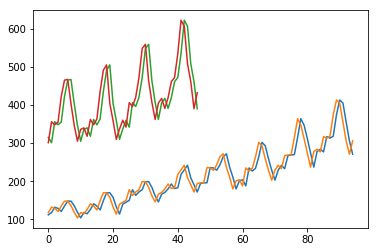

In [5]:
# remodelamos X=t y Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
plt.plot(trainX)
plt.plot(trainY)
plt.plot(testX)
plt.plot(testY)
plt.show()

In [10]:
# crear y adaptar el modelo Perceptron multicapa
model = Sequential()
# capa oculta 8 entradas, optimizador relu :)
model.add(Dense(12, input_dim=look_back, activation='relu'))
# salida de una salida
model.add(Dense(1))
# ajuste de error cuadrático medio
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 0s - loss: 22968.2440
Epoch 2/200
 - 0s - loss: 16656.0436
Epoch 3/200
 - 0s - loss: 11118.9745
Epoch 4/200
 - 0s - loss: 6786.2994
Epoch 5/200
 - 0s - loss: 3765.9659
Epoch 6/200
 - 0s - loss: 1994.9391
Epoch 7/200
 - 0s - loss: 1081.2944
Epoch 8/200
 - 0s - loss: 706.1841
Epoch 9/200
 - 0s - loss: 583.1896
Epoch 10/200
 - 0s - loss: 556.7959
Epoch 11/200
 - 0s - loss: 548.6762
Epoch 12/200
 - 0s - loss: 545.6444
Epoch 13/200
 - 0s - loss: 542.5502
Epoch 14/200
 - 0s - loss: 546.2384
Epoch 15/200
 - 0s - loss: 549.0407
Epoch 16/200
 - 0s - loss: 544.5992
Epoch 17/200
 - 0s - loss: 548.6083
Epoch 18/200
 - 0s - loss: 545.3664
Epoch 19/200
 - 0s - loss: 543.0464
Epoch 20/200
 - 0s - loss: 543.0726
Epoch 21/200
 - 0s - loss: 551.0135
Epoch 22/200
 - 0s - loss: 544.3730
Epoch 23/200
 - 0s - loss: 544.3502
Epoch 24/200
 - 0s - loss: 545.0122
Epoch 25/200
 - 0s - loss: 544.3628
Epoch 26/200
 - 0s - loss: 545.9816
Epoch 27/200
 - 0s - loss: 551.5285
Epoch 28/200
 - 0s - loss: 

In [7]:
# Estimacion del rendimiento del modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Resultado del entrenamiento: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Resultado del test: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Resultado del entrenamiento: 538.30 MSE (23.20 RMSE)
Resultado del test: 2341.73 MSE (48.39 RMSE)


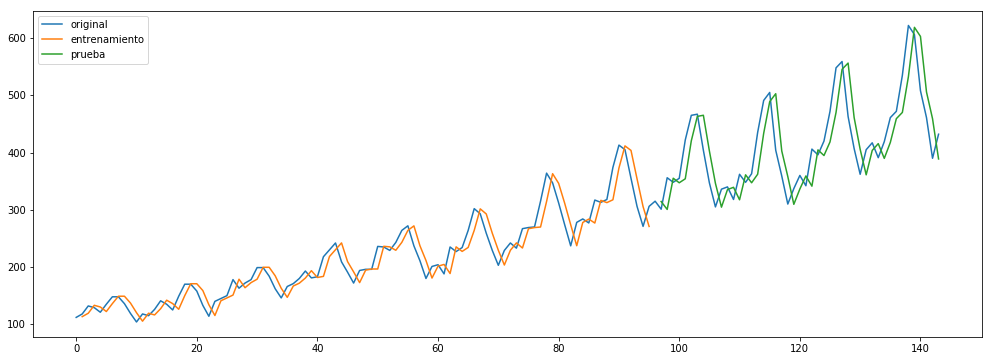

In [8]:
# predicciones del entrenamiento generadas
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
plt.figure(figsize=(17,6))
plt.plot(dataset,label='original')
tp = [numpy.nan]*len(dataset)
tp[look_back:(len(trainPredict)+look_back)]=trainPredict
tp1 = [numpy.nan]*len(dataset)
plt.plot(tp,label='entrenamiento')
tp1[(len(trainPredict)+look_back*2):len(testPredict)]=testPredict
plt.plot(tp1,label='prueba')
plt.legend()
plt.show()

dict_keys(['loss'])


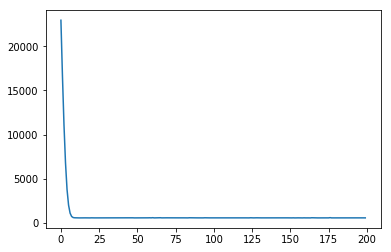

In [15]:
#lista de datos del historial
print(history.history.keys())
plt.plot(history.history['loss'])